# **Problem 1: Blackbox Function Classification (5 Points)**

## **Point Distribution**

| **Criterion**                                                       | **Description**                                                                                                                                                                                                                     | **Points** |
|---------------------------------------------------------------------|-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|-----------|
| **1. Correctly identifying possibility/impossibility**             | Clearly states whether it is or is not possible to build a \(k\)-NN classifier using the black-box 1-NN function.                                                                                                                   | 1         |
| **2. Key insight or reasoning**                                    | Demonstrates understanding of how repeated calls to the 1-NN black-box can be leveraged to retrieve the top \(k\) neighbors.                                                                                                        | 1         |
| **3. Detailed approach or algorithm**                              | Provides a clear, step-by-step method or pseudo-code for retrieving the top \(k\) neighbors by successively removing found neighbors, and explains why it works.                                                                    | 2         |
| **4. Classification step (majority voting)**                       | Describes the final decision rule (e.g., majority vote) among the \(k\) neighbors and how the labels are aggregated.                                                                                                               | 1         |


## 1. Correctly Identifying Possibility/Impossibility (1 Point)  
Yes, it is possible to construct a $k$-NN classifier using the black-box function $f()$. Although $f()$ only provides the 1-nearest neighbor, we can leverage multiple calls to the function to retrieve the top $k$ nearest neighbors and perform classification using majority voting.

## 2. Key Insight or Reasoning (1 Point)  

k-NN assumes that data points are independent, meaning each neighbor contributes to the classification without dependencies on other points. In addition, k-NN is a non-parametric, lazy learning algorithm that does not explicitly learn a model but memorizes training data and performs computations at query time. The lack of explicit distance information means we rely entirely on repeated calls to $f()$ to construct a meaningful approximation of k-NN. Thus, even without explicit distance measures, we can successfully construct a $k$-NN classifier.

The key idea is to iteratively query the black-box function while removing previously found neighbors to approximate the $k$-nearest neighbors. Since $f()$ always returns the nearest neighbor of $P_z$, we can successively exclude discovered neighbors to simulate a $k$-NN behavior. This works under the assumption that the nearest neighbors found in previous calls remain the closest when removed from the dataset.

## 3. Detailed Approach or Algorithm (2 Points)  
A step-by-step approach to constructing a $k$-NN classifier using $f()$:

1. **Initialize**: Start with the given dataset $P = \{P_1, P_2, ..., P_n\}$.
2. **Find Nearest Neighbor**: Call $f(P, P_z)$ to get the nearest neighbor $P_1'$ and its class label.
3. **Remove Found Neighbor**: Exclude $P_1'$ from the dataset.
4. **Repeat**: Call $f(P / P_1', P_z)$ again to find the next nearest neighbor $P_2'$, and repeat until $k$ neighbors are retrieved.
5. **Store Labels**: Store the class labels of these $k$ neighbors.
6. **Majority Voting**: Assign $P_z$ the most frequent label among its $k$-nearest neighbors.

The method works because nearest neighbors can be discovered sequentially by removing already found neighbors. This approach effectively simulates a $k$-NN search by transforming multiple 1-NN queries into a broader search.

## 4. Classification Step (Majority Voting) (1 Point)

Once we retrieve the $k$ nearest neighbors, we classify $P_z$ by applying a **majority voting rule**:
- Count the frequency of class labels among the $k$-neighbors.
- Assign the most common class label to $P_z$.

---

# **Problem 2: Blackbox KNN with m Neighbors (5 Points)**

## **Point Distribution for Question 02**

| **Criterion**                                        | **Description**                                                                                                                                                                                                                           | **Points** |
|:-----------------------------------------------------|:------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|-----------:|
| **1. Correct for k=multiple of m** | Clearly states that k=mulitple of m will work and provides correct reasoning.                                                                                                                       | 1          |
| **2. Correct for k>m**                      | Clearly states that k>m will work and provides correct reasoning.                                                                   | 2          |
| **2. Correct for k<m**                      | Clearly states that \(k<m)\ will NOT work and provides correct reasoning.                           | 2          |






#Solution for question 02

## Correct Answer:

It will depend on the values of k and m. If k = multiple of m (e.g. 1m, 2m), yes, it **is** possible to construct a \(k\)-NN classifier using the black-box function $f()$ that returns $m$ nearest neighbors (and their labels).

If k is not a multiple of m, there can be two situations:

If **$k>m$**, we can use the function to simulate kNN. We can combine multiple queries to \(f\), along with gradual removal of singular data points, to isolate the true $k$ nearest neighbors.

However, If **$k<m$**, we cannot use the function to construct a kNN classifier.



## Detailed Approach and reasoning for each case

## 1. Case A: k = multiple of m (1 point)
This is straightforward. For example, if k = 3m, we simply call the function 3 times and it will get us the k or 3m nearest neighbors. After each call we would have to remove the m closest points we received from the function.


##2. Case B: k > m and k is not a multiple of m:   (2 points)

Imagine, k = x.m+n where x and n are integers. We will call the function repeatedly until get the K top nearest neighbors. After each call, we would have to remove only any one of the received points from the dataset. This way, the function will keep returning the next closest point. Our set of nearest neighbors will increase by one in each step.


* Let us explain this with an example. Suppose, k = 5 and m = 2. Meaning, here, k = 2m + 1.

  Our dataset of points is: {1,2,3,4,5,6,7,8,9,10}. Suppose that our new point is 0. Hence, the closest k=5 points would be 1,2,3,4,5.

1. Step 1: Call function. It will return [1,2]

2. Step 2: Remove any one of [1,2] from the dataset and call function again. Let us remove 1 (you can remove 2 instead). It will now return [2,3].
We now know that [1,2,3] are the top three closest points.

3. Step 3: Same as before, remove any one of [2,3] from the dataset and call function again. Let us remove 2 (you can remove 3 instead). It will now return [3,4].
We now know that [1,2,3,4] are the top four closest points.

4. Step 4: Same as before, remove any one of [3,4] from the dataset and call function again. Let us remove 3 (you can remove 4 instead). It will now return [4,5].
We now know that [1,2,3,4,5] are the top five closest points.

Hence, our k=5 closest points are [1,2,3,4,5].

If our k was larger (i.e. 13), we would just keep repeating the steps like this until we get the top K closest points.




### 3.Case C: k < m:  (2 points)

In this case, calling the function once will return more points than we need. There is no way to filter the m-points to get the k closest points. For example, suppose, k=2 and m=5 in the same dataset as before with {1,2,3,4,5,6,7,8} and the new point is 0.

Calling the function will return [1,2,3,4,5]. We cannot filter this in any way to get only 1,2. Remember, in practice, we do NOT have any idea about the distance metric. So, we do NOT know that 1 or 2 is closer than the other points.

There is a way to solve the k\<m case by duplicating the dataset so it becomes a k\>m case but you are not expected to say this in order to gain full credit.



# **Problem 3: Support Vectors Plotting (10 Points)**

## **Point Distribution**

| **Criterion** | **Description** | **Points** |
|--------------|----------------|------------|
| **1. Plotting Data** | Correctly plots the given data points on a 2D plane, with class distinctions and proper labeling. | **2 Points** |
| **2. Identifying Support Vectors** | Correctly identifies the number of support vectors, lists their coordinates, and specifies which class each support vector supports. | **2 Points** |
| **3. Writing the Hyperplane Equation** | Derives and presents the equation of the optimal separating hyperplane in a clear, correctly formatted manner. | **2 Points** |
| **4. Computing and Interpreting the Margin** | Correctly calculates the margin and provides an interpretation of its significance in classification. | **2 Points** |
| **5. Assigning Confidence Score** | Explains a valid method for computing a confidence score for SVM classification and provides reasoning for the approach. | **2 Points** |

## 1. Plot the Given Data (2 Points)

Before we can determine the optimal separating hyperplane, we need to visualize the dataset to understand how the two classes are distributed and
check if a linear separator is feasible.

The given dataset consists of two classes: Class C1 (Blue) and Class C2 (Red)
We will now plot these points.

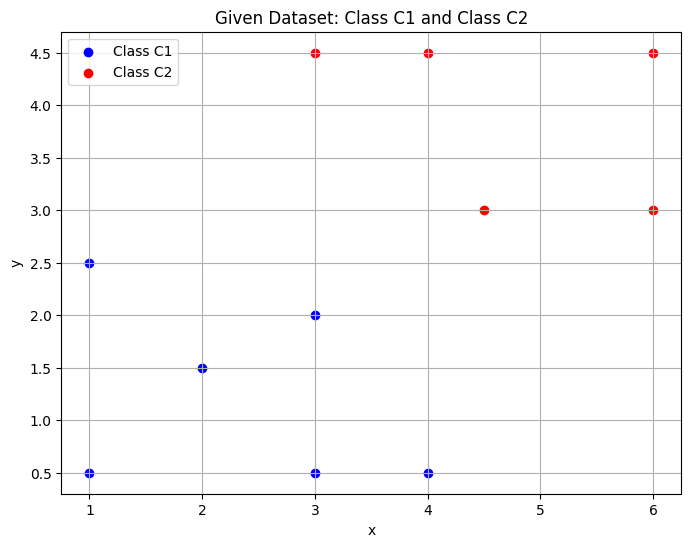

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Given dataset
class_c1 = np.array([[1, 0.5], [3, 0.5], [4, 0.5], [2, 1.5], [1, 2.5], [3, 2]])
class_c2 = np.array([[3, 4.5], [4, 4.5], [4.5, 3], [6, 3], [6, 4.5]])

# Plot dataset
plt.figure(figsize=(8, 6))
plt.scatter(class_c1[:, 0], class_c1[:, 1], color='blue', label='Class C1')
plt.scatter(class_c2[:, 0], class_c2[:, 1], color='red', label='Class C2')

# Labels and title
plt.xlabel("x")
plt.ylabel("y")
plt.title("Given Dataset: Class C1 and Class C2")
plt.legend()
plt.grid()
plt.show()

The plot clearly shows that the two classes are linearly separable, which means we can find a linear hyperplane to separate them.

## 2. Identifying Support Vectors (2 Points)

Support vectors are the data points that lie closest to the decision boundary.
They determine the margin of separation between the two classes.

We train an SVM with a linear kernel on the given points and extract the support vectors.

In [ ]:
from sklearn.svm import SVC

# Combine dataset and labels
X = np.vstack((class_c1, class_c2))
y = np.hstack((np.ones(len(class_c1)), -np.ones(len(class_c2))))  # C1 = +1, C2 = -1

# Train SVM with linear kernel
svm_model = SVC(kernel="linear")
svm_model.fit(X, y)

# Extract support vectors
support_vectors = svm_model.support_vectors_
support_vectors_count = support_vectors.shape[0]

print("Number of Support Vectors:", support_vectors_count)
print("Support Vectors:\n", support_vectors)

Number of Support Vectors: 3
Support Vectors:
 [[3.  4.5]
 [4.5 3. ]
 [3.  2. ]]


We found a total of 3 Support Vectors. (3.0, 2.0) belongs to C1 and supports C1, ensuring that the margin does not extend into C1’s region. (3.0, 4.5) and (4.5, 3.0) belong to C2 and support C2, preventing the margin from moving further into C2’s region.

## 3. Writing Out the Optimal Hyperplane Equation (2 Points)


An SVM finds a hyperplane that separates the two classes while maximizing the margin. The equation of the decision boundary follows:

$w_1 x + w_2 y + b = 0$

where $w_1$ and $w_2$ are the weight coefficients and $b$ is the bias term.

In [ ]:
# Get hyperplane coefficients
w = svm_model.coef_[0]  # Weight vector
b = svm_model.intercept_[0]  # Bias term

# Formatting the equation correctly
equation = f"{w[0]:.2f}x {'+' if w[1] >= 0 else '-'} {abs(w[1]):.2f}y {'+' if b >= 0 else '-'} {abs(b):.2f} = 0"

print("Equation of Hyperplane:", equation)


Equation of Hyperplane: -0.80x - 0.80y + 5.00 = 0


which can be rewritten as: $x+y = 5.80$

The equation defines the optimal decision boundary. Points above this line belong to C2. Points below this line belong to C1.

## 4. Computing the Margin (2 Points)

The **margin** is the distance from the decision boundary to the nearest support vectors. It is given by:

$M = \frac{2}{\|w\|}$

where $\|w\| = \sqrt{w_1^2 + w_2^2}$

In [ ]:
# Compute margin
margin = 2 / np.linalg.norm(w)
print(f"Margin: {margin:.4f}")

Margin: 1.7673


A larger margin means better generalization. Since the margin is finite and positive, this confirms that the two classes are linearly separable with a reasonable gap. The SVM ensures that the margin is maximized so that small variations in data won't cause misclassification.

## 5. Assigning Confidence Score to SVM Output (2 Points)

SVMs output hard classifications but do not inherently provide confidence scores. A confidence score can be computed as the distance of a point from the decision boundary. The formula is:

$\text{Confidence Score} = \frac{| w_1 x + w_2 y + b |}{\|w\|}$

In an SVM, classification is based on the **decision boundary**, which separates two classes by maximizing the margin. However, standard SVMs do not inherently provide confidence scores; they only output discrete class labels. A reasonable approach to quantify confidence in a classification decision is to use the **distance of a given point from the hyperplane**. The farther a point is from the decision boundary, the more confident we are in the classification. This can be formalized as:

$\text{Confidence Score} = \frac{| w_1 x + w_2 y + b |}{\|w\|}$

where $w_1$ and $w_2$ are the weight coefficients of the hyperplane, and $b$ is the bias term. This formula gives the perpendicular distance of a point from the decision boundary. A **higher confidence score** indicates that the point is well within its classified region, reducing the likelihood of misclassification. Conversely, a score close to **zero** suggests that the point lies near the boundary, making the classification uncertain. In real-world applications, such a confidence measure helps prioritize decisions, such as requiring further verification for low-confidence predictions.


In [ ]:
def confidence_score(point):
    return abs(np.dot(w, point) + b) / np.linalg.norm(w)

# Example: Confidence for a test point (5,3)
test_point = np.array([5, 3])
print(f"Confidence Score for {test_point}: {confidence_score(test_point):.4f}")

Confidence Score for [5 3]: 1.2374


Let us plot the decision boundary, support vectors, and margin for the SVM model.

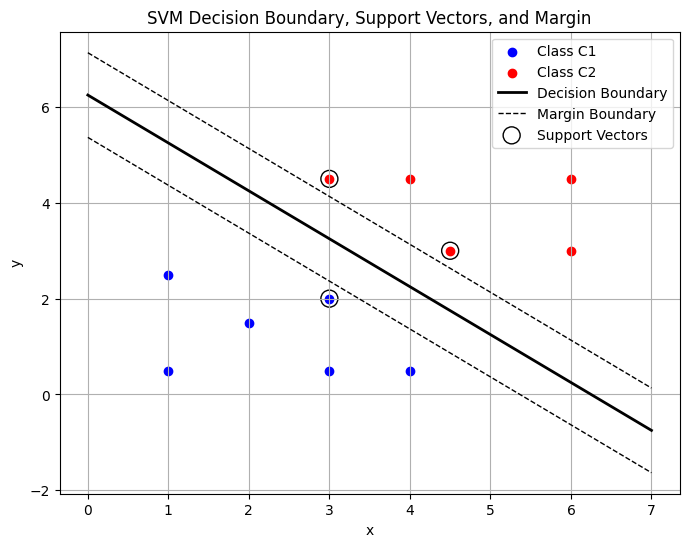

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.svm import SVC

# Given dataset
class_c1 = np.array([[1, 0.5], [3, 0.5], [4, 0.5], [2, 1.5], [1, 2.5], [3, 2]])
class_c2 = np.array([[3, 4.5], [4, 4.5], [4.5, 3], [6, 3], [6, 4.5]])

# Combine dataset and labels for SVM training
X = np.vstack((class_c1, class_c2))
y = np.hstack((np.ones(len(class_c1)), -np.ones(len(class_c2))))  # C1 = +1, C2 = -1

# Train SVM with linear kernel
svm_model = SVC(kernel="linear")
svm_model.fit(X, y)

# Extract support vectors
support_vectors = svm_model.support_vectors_

# Get hyperplane coefficients
w = svm_model.coef_[0]  # Weight vector
b = svm_model.intercept_[0]  # Bias term

# Compute margin
margin = 1 / np.linalg.norm(w)

# Define grid for plotting decision boundary
xx = np.linspace(0, 7, 100)
yy = - (w[0] * xx + b) / w[1]

# Compute margin boundaries
yy_margin_up = yy + margin * np.sign(w[1])
yy_margin_down = yy - margin * np.sign(w[1])

# Plot dataset and decision boundary
plt.figure(figsize=(8, 6))
plt.scatter(class_c1[:, 0], class_c1[:, 1], color='blue', label='Class C1')
plt.scatter(class_c2[:, 0], class_c2[:, 1], color='red', label='Class C2')

# Plot decision boundary
plt.plot(xx, yy, 'k-', linewidth=2, label="Decision Boundary")

# Plot margin boundaries
plt.plot(xx, yy_margin_up, 'k--', linewidth=1, label="Margin Boundary")
plt.plot(xx, yy_margin_down, 'k--', linewidth=1)

# Plot support vectors
plt.scatter(support_vectors[:, 0], support_vectors[:, 1], s=150, facecolors='none', edgecolors='black', label='Support Vectors')

# Labels and title
plt.xlabel("x")
plt.ylabel("y")
plt.title("SVM Decision Boundary, Support Vectors, and Margin")
plt.legend()
plt.grid()
plt.show()

# **Problem 4: Concentric Circle Separation Analysis (20 Points)**

## **Point Distribution**

| **Criterion**  | **Description**  | **Points**  |
|---------------|----------------|------------|
| **1. Evaluation of Student X’s Feature Mapping** | Correctly analyzes the strengths and weaknesses of Student X's transformation, explaining its effectiveness and potential redundancies. | **6 Points** |
| **2. Evaluation of Student Y’s Feature Mapping** | Correctly assesses Student Y’s transformation and justifies its validity as the best approach. | **6 Points** |
| **3. Evaluation of Student Z’s Argument** | Analyzes the correctness of Student Z’s claim about the kernel trick, explaining when it applies and when it does not. | **6 Points** |
| **4. Clarity and Depth of Explanation** | Provides clear, well-structured reasoning for all answers, ensuring a strong conceptual understanding. | **2 Points** |


The two concentric circles dataset is not linearly separable in its original 2D feature space $(x,y)$. A linear classifier (like an SVM with a linear kernel) cannot separate the classes effectively. However, a suitable feature mapping (kernel transformation) can project the data into a higher-dimensional space where it becomes linearly separable.

Three students propose different feature transformations to solve this issue. We will analyze their arguments one by one.

## 1. Evaluation of Student X’s Feature Mapping (6 Points)**


Student X suggests the following feature transformation:

$\phi(x,y) = [1, \sqrt{2}x, \sqrt{2}y, x^2, \sqrt{2}xy, y^2]$

The Quadratic terms $(x^2, y^2, xy)$ are useful in capturing the circular boundary, as concentric circles are naturally expressed in the equation $x^2 + y^2 = r^2$. Linear terms $(\sqrt{2}x, \sqrt{2}y)$ are not necessary for transforming the dataset, as they do not help in distinguishing between the two concentric circles. The bias term $1$ is often helpful in feature mappings as it introduces a shift in feature space.

Student X is correct. The quadratic terms are useful, but the linear terms are unnecessary for separating concentric circles. The transformation could be simplified.



## 2. Evaluation of Student Y’s Feature Mapping (6 Points)**

Student Y suggests the feature mapping:

$\phi(x,y) = [x^2, \sqrt{2}xy, y^2]$


The fully quadratic representation correctly captures the circular pattern because the decision boundary can be defined by $x^2 + y^2 = r^2$. Unlike Student X, this transformation does not include any linear terms, making it more efficient.

Student Y is correct. This transformation is the most optimal, as it maps the concentric circles to a space where they become linearly separable.



## 3. Evaluation of Student Z’s Argument (6 Points)**

Student Z argues that explicit transformation is unnecessary because SVMs internally apply the kernel trick.

This is correct only if using a non-linear kernel. The kernel trick allows SVMs to compute dot products in a higher-dimensional space implicitly, without requiring manual transformation. However, since Student Z is only using a linear kernel (without an RBF or polynomial kernel), their approach is incorrect because a linear SVM will fail on concentric circles.

Student Z is wrong if they are using only a linear SVM, because linear decision boundaries cannot separate concentric circles.

## Summary of Evaluation, Clarity and Depth of Explanation (2 Points)**

### **Visualization of the Proposed Three Approaches (Optional)**

Let us visualize the three students' solution to verify the correctness of their proposed approaches.

Comparison of All Solutions:
Student X - Train Accuracy: 1.0000, Test Accuracy: 1.0000
Student Y - Train Accuracy: 1.0000, Test Accuracy: 1.0000
Student Z - Train Accuracy: 0.5625, Test Accuracy: 0.5200


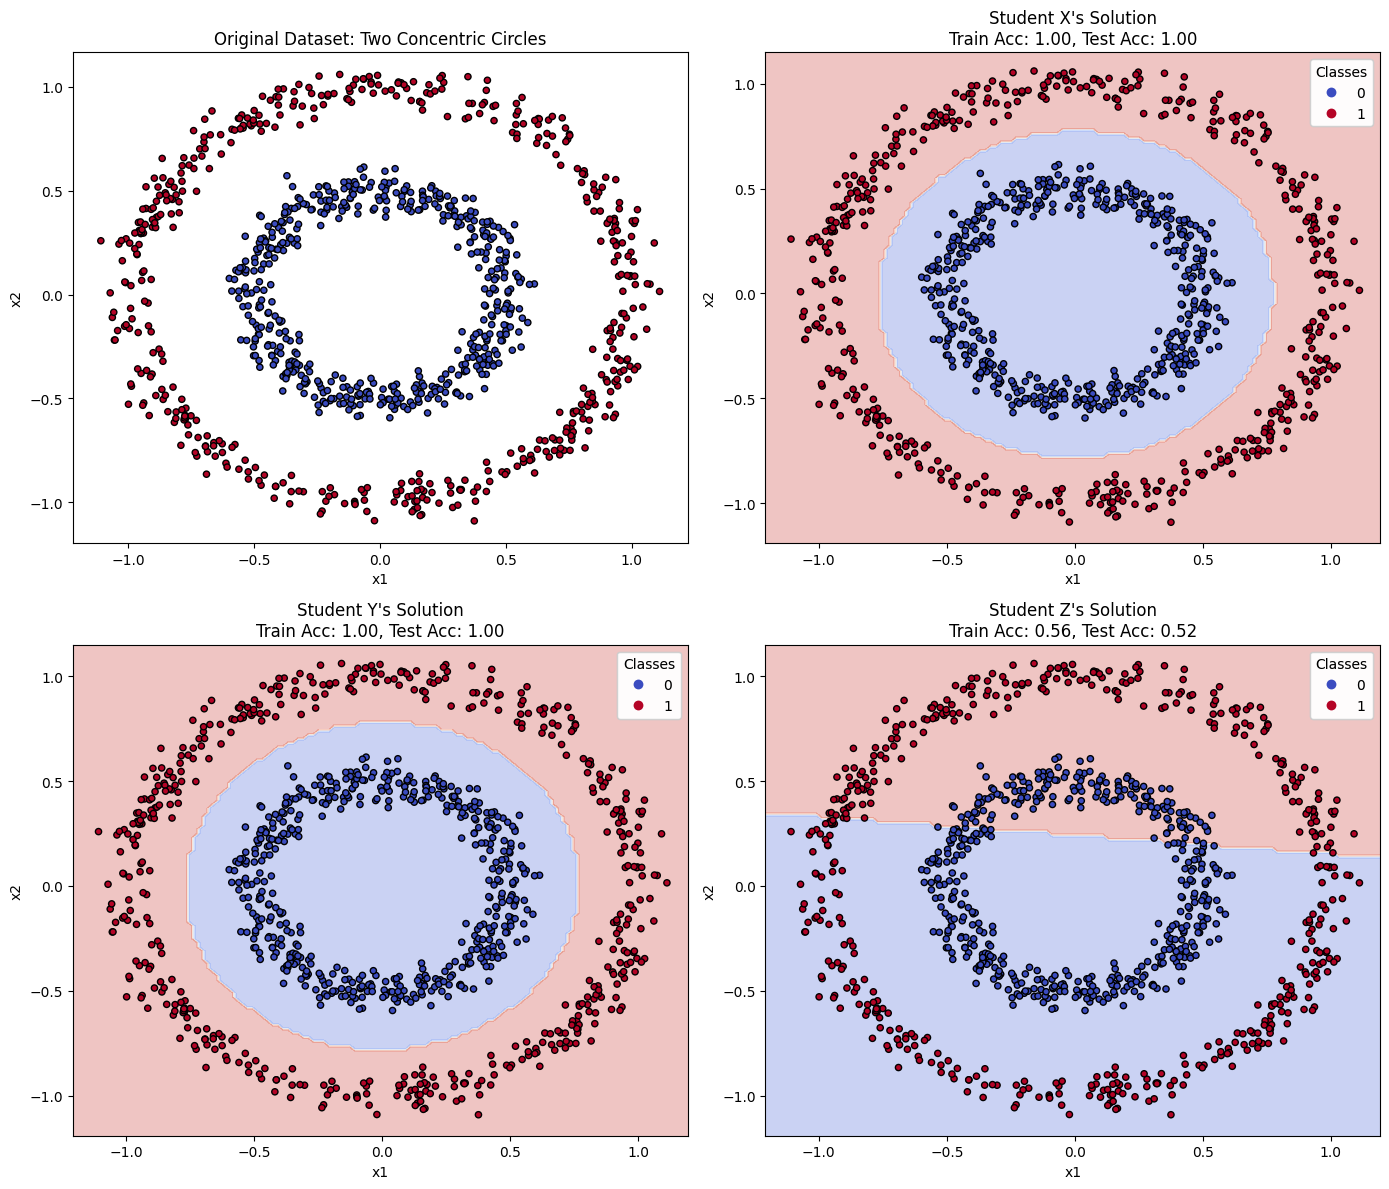

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split

# Set random seed for reproducibility
np.random.seed(42)

# Generate concentric circles dataset
def generate_concentric_circles(n_samples=1000, noise=0.1, factor=0.5):
    """Generate a dataset of concentric circles"""
    # Outer circle
    outer_radius = 1.0
    outer_x = np.random.normal(0, 1, int(n_samples/2))
    outer_y = np.random.normal(0, 1, int(n_samples/2))
    outer_r = np.sqrt(outer_x**2 + outer_y**2)
    outer_x = outer_x / outer_r * outer_radius + np.random.normal(0, noise, int(n_samples/2))
    outer_y = outer_y / outer_r * outer_radius + np.random.normal(0, noise, int(n_samples/2))

    # Inner circle
    inner_radius = outer_radius * factor
    inner_x = np.random.normal(0, 1, int(n_samples/2))
    inner_y = np.random.normal(0, 1, int(n_samples/2))
    inner_r = np.sqrt(inner_x**2 + inner_y**2)
    inner_x = inner_x / inner_r * inner_radius + np.random.normal(0, noise, int(n_samples/2))
    inner_y = inner_y / inner_r * inner_radius + np.random.normal(0, noise, int(n_samples/2))

    # Combine into a single dataset
    X = np.vstack([np.column_stack([outer_x, outer_y]), np.column_stack([inner_x, inner_y])])
    y = np.hstack([np.ones(int(n_samples/2)), np.zeros(int(n_samples/2))])

    return X, y

# Create the dataset
X, y = generate_concentric_circles(n_samples=1000, noise=0.05, factor=0.5)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature transformations according to each student
def student_x_mapping(X):
    """Student X's feature mapping: φ(x,y) = [1, √2x, √2y, x², √2xy, y²]"""
    x, y = X[:, 0], X[:, 1]
    return np.column_stack([
        np.ones(len(x)),  # 1
        np.sqrt(2) * x,   # √2x
        np.sqrt(2) * y,   # √2y
        x**2,             # x²
        np.sqrt(2) * x * y, # √2xy
        y**2              # y²
    ])

def student_y_mapping(X):
    """Student Y's feature mapping: φ(x,y) = [x², √2xy, y²]"""
    x, y = X[:, 0], X[:, 1]
    return np.column_stack([
        x**2,              # x²
        np.sqrt(2) * x * y, # √2xy
        y**2               # y²
    ])

def student_z_mapping(X):
    """Student Z's feature mapping: φ(x,y) = [x, y]"""
    # No transformation needed, return X as is
    return X

# Function to plot the decision boundary and dataset
def plot_decision_boundary(X, y, model, title, ax):
    # Set min and max for the meshgrid
    x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
    y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1

    # Create meshgrid
    h = 0.02  # Step size
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

    # Get predictions for meshgrid points
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    # Plot decision boundary and data points
    ax.contourf(xx, yy, Z, alpha=0.3, cmap='coolwarm')
    scatter = ax.scatter(X[:, 0], X[:, 1], c=y, cmap='coolwarm', edgecolor='k', s=20)
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_title(title)
    ax.set_xlabel('x1')
    ax.set_ylabel('x2')

    # Add legend
    legend1 = ax.legend(*scatter.legend_elements(), title="Classes")
    ax.add_artist(legend1)

# Create figure for plotting
fig, axes = plt.subplots(2, 2, figsize=(14, 12))
axes = axes.flatten()

# Plot original dataset
axes[0].scatter(X[:, 0], X[:, 1], c=y, cmap='coolwarm', edgecolor='k', s=20)
axes[0].set_title('Original Dataset: Two Concentric Circles')
axes[0].set_xlabel('x1')
axes[0].set_ylabel('x2')

# Train and evaluate Student X's model
student_x_features_train = student_x_mapping(X_train)
student_x_features_test = student_x_mapping(X_test)
student_x_model = SVC(kernel='linear', C=1.0)
student_x_model.fit(student_x_features_train, y_train)
student_x_train_score = student_x_model.score(student_x_features_train, y_train)
student_x_test_score = student_x_model.score(student_x_features_test, y_test)

# For plotting, we need to create a model that wraps the feature transformation
class ModelWithTransform:
    def __init__(self, model, transform_func):
        self.model = model
        self.transform_func = transform_func

    def predict(self, X):
        X_transformed = self.transform_func(X)
        return self.model.predict(X_transformed)

student_x_wrapper = ModelWithTransform(student_x_model, student_x_mapping)
plot_decision_boundary(X, y, student_x_wrapper,
                       f"Student X's Solution\nTrain Acc: {student_x_train_score:.2f}, Test Acc: {student_x_test_score:.2f}",
                       axes[1])

# Train and evaluate Student Y's model
student_y_features_train = student_y_mapping(X_train)
student_y_features_test = student_y_mapping(X_test)
student_y_model = SVC(kernel='linear', C=1.0)
student_y_model.fit(student_y_features_train, y_train)
student_y_train_score = student_y_model.score(student_y_features_train, y_train)
student_y_test_score = student_y_model.score(student_y_features_test, y_test)

student_y_wrapper = ModelWithTransform(student_y_model, student_y_mapping)
plot_decision_boundary(X, y, student_y_wrapper,
                       f"Student Y's Solution\nTrain Acc: {student_y_train_score:.2f}, Test Acc: {student_y_test_score:.2f}",
                       axes[2])

# Train and evaluate Student Z's model
student_z_features_train = student_z_mapping(X_train)
student_z_features_test = student_z_mapping(X_test)
student_z_model = SVC(kernel='linear', C=1.0)
student_z_model.fit(student_z_features_train, y_train)
student_z_train_score = student_z_model.score(student_z_features_train, y_train)
student_z_test_score = student_z_model.score(student_z_features_test, y_test)

student_z_wrapper = ModelWithTransform(student_z_model, student_z_mapping)
plot_decision_boundary(X, y, student_z_wrapper,
                       f"Student Z's Solution\nTrain Acc: {student_z_train_score:.2f}, Test Acc: {student_z_test_score:.2f}",
                       axes[3])

# Compare all solutions
print("Comparison of All Solutions:")
print(f"Student X - Train Accuracy: {student_x_train_score:.4f}, Test Accuracy: {student_x_test_score:.4f}")
print(f"Student Y - Train Accuracy: {student_y_train_score:.4f}, Test Accuracy: {student_y_test_score:.4f}")
print(f"Student Z - Train Accuracy: {student_z_train_score:.4f}, Test Accuracy: {student_z_test_score:.4f}")

plt.tight_layout()
plt.show()

The visualization confirms that both quadratic feature mappings (X and Y) successfully transform the problem into a linearly separable one, while the linear approach (Z) fails as expected.

# **Problem 5: Wine Data Classification (30 Points)**

## **Point Distribution**

| **Criterion**  | **Description**  | **Points**  |
|---------------|----------------|------------|
| **1. Choice of k for Cross-Validation** | Justifies a reasonable value for `k` in k-fold cross-validation, explaining its relevance to dataset size. | **4 Points** |
| **2. Data Selection and Feature Choice** | Correctly selects `alcohol` and `malic_acid` as features and explains why they are suitable. | **4 Points** |
| **3. Data Visualization and Distribution Analysis** | Creates **marginal and joint distributions** of the selected features and interprets patterns. | **4 Points** |
| **4. Assumptions Based on Visualization** | Formulates hypotheses about feature usefulness and separability based on visualization. | **4 Points** |
| **5. Model Implementation and Evaluation** | Trains three models (**Linear SVM, RBF SVM, K-NN**) and evaluates them using accuracy, precision, recall, and F1-score. | **6 Points** |
| **6. Model Performance Analysis** | Analyse and provide reasoning for model strengths and weaknesses. | **4 Points** |
| **7. Analysis of Results and Model Comparison** | Compares model performance and discusses their equivalence, strengths, and limitations. | **4 Points** |


## **Step 1: Choosing a Suitable k for Cross-Validation (4 Points)**

K-fold cross-validation ensures that our model is robust and generalizes well. It helps reduce bias and variance in performance evaluation.

First, let's acquire the Wine dataset and set up appropriate cross-validation.


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score, classification_report
from mlxtend.plotting import plot_decision_regions
import warnings
warnings.filterwarnings('ignore')

# Load the Wine dataset
wine = load_wine()
df = pd.DataFrame(data=wine.data, columns=wine.feature_names)
df['target'] = wine.target

# Display basic information
print(f"Dataset shape: {df.shape}")
print(f"Class distribution: {df['target'].value_counts()}")

Dataset shape: (178, 14)
Class distribution: target
1    71
0    59
2    48
Name: count, dtype: int64


For cross-validation, let us choose k=5 for this dataset. This is appropriate because the Wine dataset is relatively small (178 samples). 5-fold cross-validation provides a good balance between bias and variance and each fold has approximately 50-60 samples, which is sufficient for training while keeping enough samples for validation. A moderate k value also helps to smooth out the decision boundary, letting us capture broader patterns rather than local patterns and noise which may hurt generalization.

## **Step 2: Selecting Two Features (`alcohol` and `malic_acid`) (4 Points)**

**Alcohol** and **Malic Acid** are fundamental wine properties since Alcohol content varies significantly between wine classes. Malic acid** contributes to wine's acidity, affecting classification.

By using only two features, we can easily visualize decision boundaries. This reduces model complexity while maintaining classification power.

Let us filter out these features from our dataset.


In [ ]:
# Select the two specified features
X = df[['alcohol', 'malic_acid']]
y = df['target']

# Split the data for later evaluation
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

X_train.columns, X_test.columns

(Index(['alcohol', 'malic_acid'], dtype='object'),
 Index(['alcohol', 'malic_acid'], dtype='object'))

## **Step 3: Data Visualization and Distribution Analysis (4 Points)**



Let us plot:

* Marginal Distributions for alcohol and malic_acid.
* 2D Joint Distribution to see how classes separate.

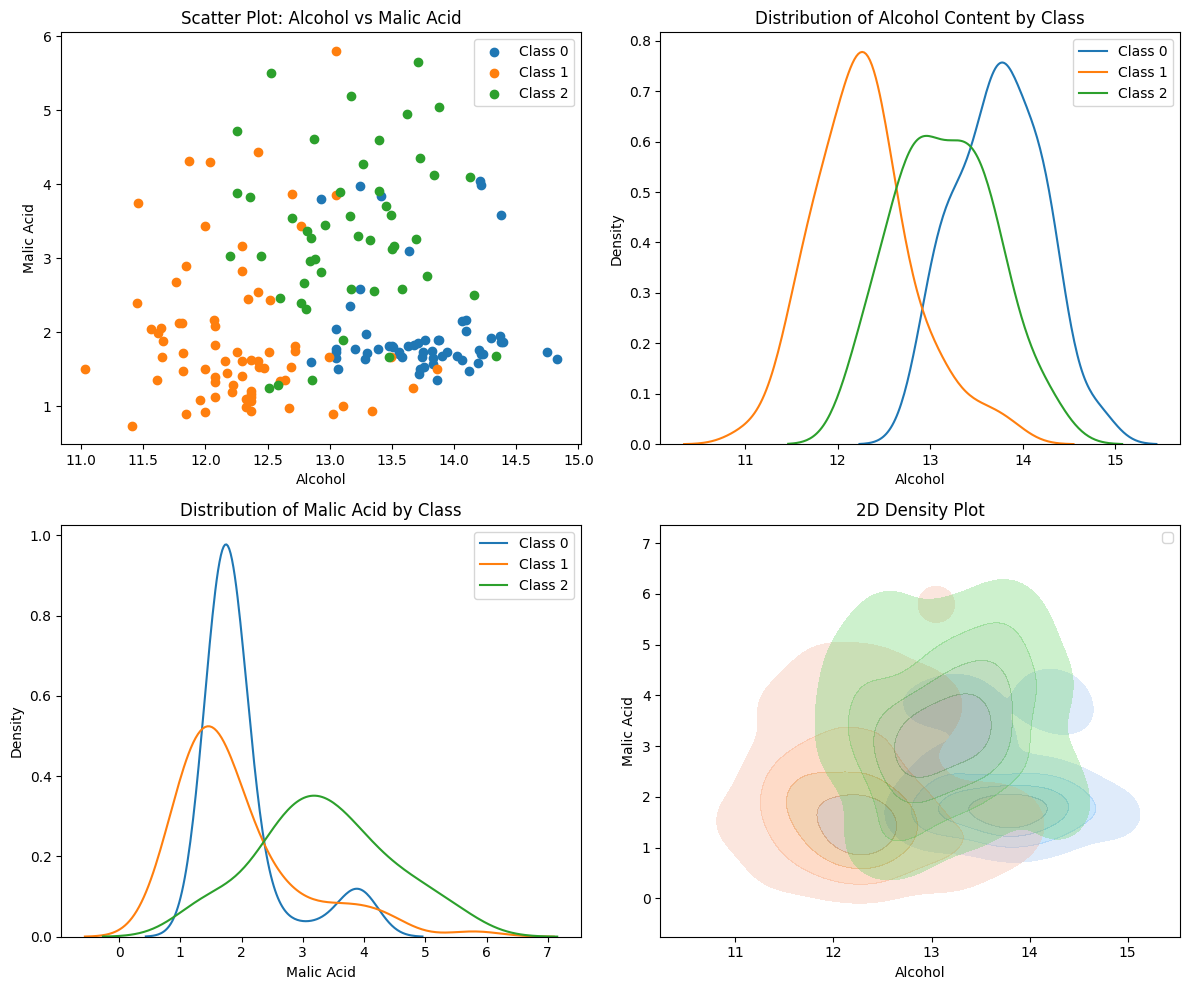

In [ ]:
plt.figure(figsize=(12, 10))

# Joint plot
plt.subplot(2, 2, 1)
for i in range(3):
    plt.scatter(df[df['target'] == i]['alcohol'],
                df[df['target'] == i]['malic_acid'],
                label=f'Class {i}')
plt.title('Scatter Plot: Alcohol vs Malic Acid')
plt.xlabel('Alcohol')
plt.ylabel('Malic Acid')
plt.legend()

# Alcohol distribution by class
plt.subplot(2, 2, 2)
for i in range(3):
    sns.kdeplot(df[df['target'] == i]['alcohol'], label=f'Class {i}')
plt.title('Distribution of Alcohol Content by Class')
plt.xlabel('Alcohol')
plt.legend()

# Malic acid distribution by class
plt.subplot(2, 2, 3)
for i in range(3):
    sns.kdeplot(df[df['target'] == i]['malic_acid'], label=f'Class {i}')
plt.title('Distribution of Malic Acid by Class')
plt.xlabel('Malic Acid')
plt.legend()

# 2D density plot
plt.subplot(2, 2, 4)
for i in range(3):
    subset = df[df['target'] == i]
    sns.kdeplot(x=subset['alcohol'], y=subset['malic_acid'],
                levels=5, fill=True, alpha=0.3, label=f'Class {i}')
plt.title('2D Density Plot')
plt.xlabel('Alcohol')
plt.ylabel('Malic Acid')
plt.legend()

plt.tight_layout()
plt.show()

## **Step 4: Formulating Assumptions from Visualization (4 Points)**

From the above visualizations, we can make a few interesting observations.

The classes show some degree of separation in the 2D space of alcohol and malic acid, but there's also overlap. Classes 0 and 1 appears to have higher alcohol content, while Class 2 has lower average alcohol content. This suggests alcohol is a discriminative feature. Class 0 appears to have higher malic acid content compared to Classes 1 and 2, which could help in distinguishing Class 0.

Due to the overlapping nature of the classes, we can expect Linear SVM to struggle with complete separation. RBF kernel SVM might perform better by creating non-linear boundaries, while KNN could perform well in regions where classes are well-clustered.

Complete separation might not be possible using just these two features, suggesting we might see moderate but not perfect classification performance.



## **Step 5: Training and Evaluating SVM & KNN Models (6 Points)**

Let us fit the below models:

- SVM (Linear)
- SVM (RBF)
- K-NN (k=5)

We will use the below metrics for model performance comparative analysis:

- Accuracy
- Precision
- Recall
- F1-Score

--- Linear SVM Performance ---
Accuracy: 0.8056
Precision: 0.8214
Recall: 0.8056
F1 Score: 0.8107

Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.79      0.81        14
           1       0.92      0.86      0.89        14
           2       0.60      0.75      0.67         8

    accuracy                           0.81        36
   macro avg       0.79      0.80      0.79        36
weighted avg       0.82      0.81      0.81        36

--- RBF SVM Performance ---
Accuracy: 0.8889
Precision: 0.9259
Recall: 0.8889
F1 Score: 0.8945

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.79      0.88        14
           1       1.00      0.93      0.96        14
           2       0.67      1.00      0.80         8

    accuracy                           0.89        36
   macro avg       0.89      0.90      0.88        36
weighted avg       0.93      0.89      0.89        3

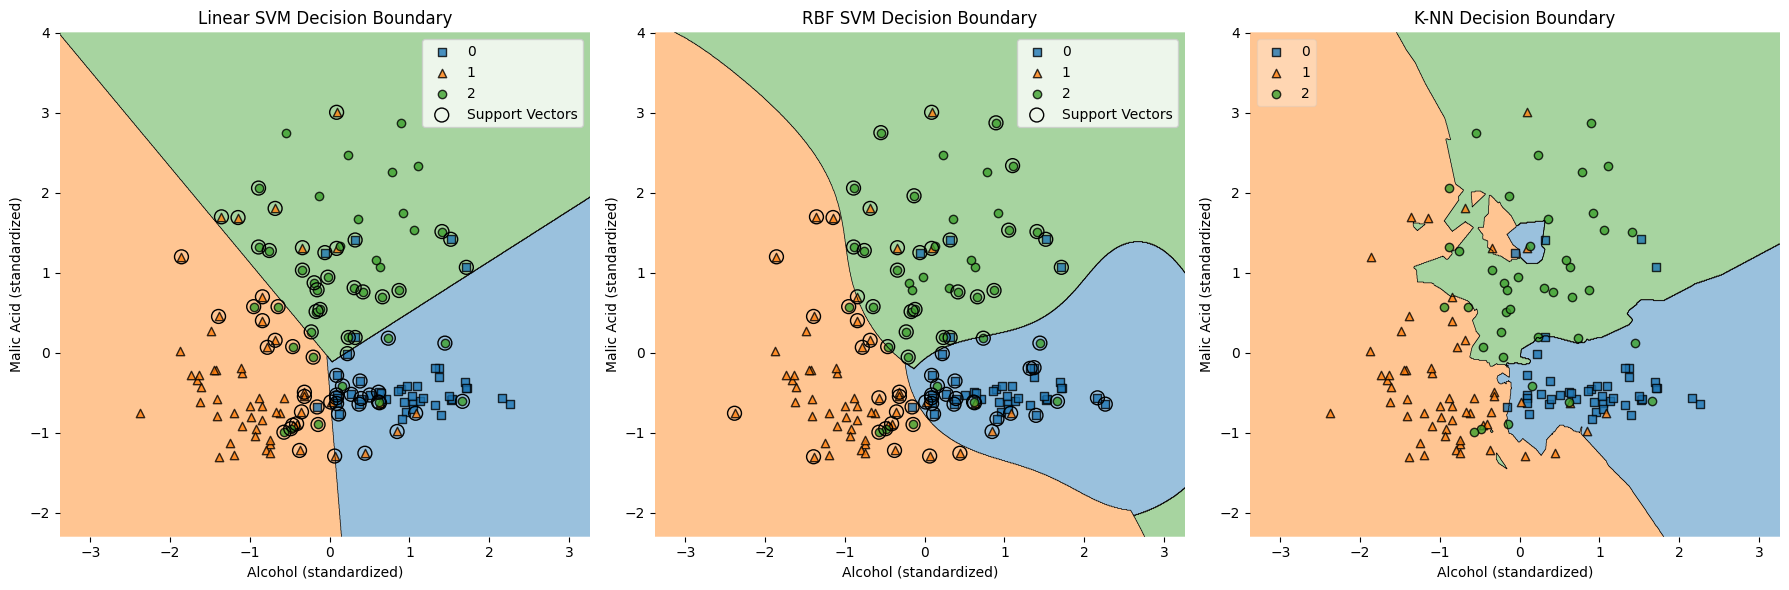

Number of support vectors in Linear SVM: [18 24 28]
Number of support vectors in RBF SVM: [22 26 29]


In [ ]:
# Function to evaluate model performance
def evaluate_model(model, X_train, X_test, y_train, y_test, model_name):
    # Train the model
    model.fit(X_train, y_train)

    # Make predictions
    y_pred = model.predict(X_test)

    # Calculate metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')

    print(f"--- {model_name} Performance ---")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1 Score: {f1:.4f}")
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred))

    return model

# Create and evaluate models
linear_svm = evaluate_model(SVC(kernel='linear', C=1.0, random_state=42),
                           X_train_scaled, X_test_scaled, y_train, y_test,
                           "Linear SVM")

rbf_svm = evaluate_model(SVC(kernel='rbf', C=1.0, gamma='scale', random_state=42),
                         X_train_scaled, X_test_scaled, y_train, y_test,
                         "RBF SVM")

knn = evaluate_model(KNeighborsClassifier(n_neighbors=5),
                     X_train_scaled, X_test_scaled, y_train, y_test,
                     "K-NN (k=5)")

# Plotting decision boundaries
plt.figure(figsize=(18, 6))

# Plot decision boundary for Linear SVM
plt.subplot(1, 3, 1)
plot_decision_regions(X_train_scaled, y_train.values, clf=linear_svm, legend=2)
plt.title('Linear SVM Decision Boundary')
plt.xlabel('Alcohol (standardized)')
plt.ylabel('Malic Acid (standardized)')

# Highlight support vectors
sv = linear_svm.support_vectors_
plt.scatter(sv[:, 0], sv[:, 1], s=100, linewidth=1, facecolors='none', edgecolors='k', label='Support Vectors')
plt.legend()

# Plot decision boundary for RBF SVM
plt.subplot(1, 3, 2)
plot_decision_regions(X_train_scaled, y_train.values, clf=rbf_svm, legend=2)
plt.title('RBF SVM Decision Boundary')
plt.xlabel('Alcohol (standardized)')
plt.ylabel('Malic Acid (standardized)')

# Highlight support vectors
sv = rbf_svm.support_vectors_
plt.scatter(sv[:, 0], sv[:, 1], s=100, linewidth=1, facecolors='none', edgecolors='k', label='Support Vectors')
plt.legend()

# Plot decision boundary for KNN
plt.subplot(1, 3, 3)
plot_decision_regions(X_train_scaled, y_train.values, clf=knn, legend=2)
plt.title('K-NN Decision Boundary')
plt.xlabel('Alcohol (standardized)')
plt.ylabel('Malic Acid (standardized)')

plt.tight_layout()
plt.show()

# Display the number of support vectors for each SVM model
print(f"Number of support vectors in Linear SVM: {linear_svm.n_support_}")
print(f"Number of support vectors in RBF SVM: {rbf_svm.n_support_}")

Now, let us also plot the Support Vectors.

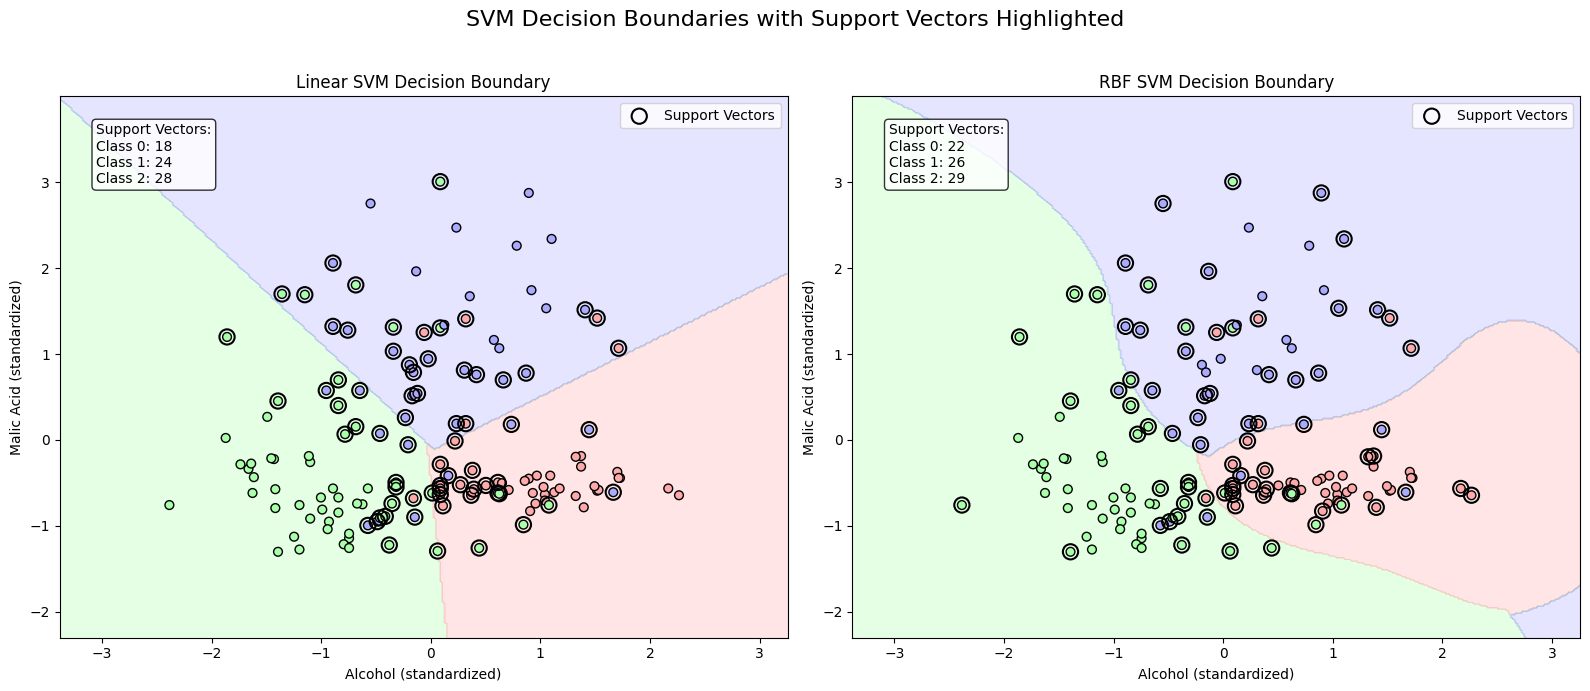

Total support vectors for Linear SVM: 70
Support vectors per class (Linear SVM): [18 24 28]

Total support vectors for RBF SVM: 77
Support vectors per class (RBF SVM): [22 26 29]

Linear SVM Test Accuracy: 0.8056
RBF SVM Test Accuracy: 0.8889


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
import matplotlib.colors as colors

# Load the Wine dataset
wine = load_wine()
X = wine.data[:, [0, 1]]  # Selecting alcohol and malic acid
y = wine.target

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train Linear SVM
linear_svm = SVC(kernel='linear', C=1.0, random_state=42)
linear_svm.fit(X_train_scaled, y_train)

# Train RBF SVM
rbf_svm = SVC(kernel='rbf', C=1.0, gamma='scale', random_state=42)
rbf_svm.fit(X_train_scaled, y_train)

# Function to plot decision boundaries and support vectors
def plot_svm_decision_boundary(X, y, model, ax, title):
    # Create a mesh grid
    h = 0.02  # Step size in the mesh
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

    # Plot the decision boundary
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    # Create a custom colormap
    cmap = colors.ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])

    # Plot the decision surface
    ax.contourf(xx, yy, Z, cmap=cmap, alpha=0.3)

    # Plot the training points
    scatter = ax.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap, edgecolors='k', s=40)

    # Highlight the support vectors
    ax.scatter(model.support_vectors_[:, 0], model.support_vectors_[:, 1],
              s=120, facecolors='none', edgecolors='k', linewidth=1.5,
              label='Support Vectors')

    # Add labels and title
    ax.set_xlabel('Alcohol (standardized)')
    ax.set_ylabel('Malic Acid (standardized)')
    ax.set_title(title)
    ax.legend()

    # Count support vectors per class
    support_vector_indices = model.support_
    support_vector_classes = y_train[support_vector_indices]
    sv_counts = [sum(support_vector_classes == i) for i in range(3)]

    # Add text with support vector counts
    sv_text = f"Support Vectors:\nClass 0: {sv_counts[0]}\nClass 1: {sv_counts[1]}\nClass 2: {sv_counts[2]}"
    ax.text(0.05, 0.95, sv_text, transform=ax.transAxes,
            verticalalignment='top', bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))

    return ax

# Create a figure with two subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 7))

# Plot Linear SVM
plot_svm_decision_boundary(X_train_scaled, y_train, linear_svm, ax1, 'Linear SVM Decision Boundary')

# Plot RBF SVM
plot_svm_decision_boundary(X_train_scaled, y_train, rbf_svm, ax2, 'RBF SVM Decision Boundary')

# Add overall title
fig.suptitle('SVM Decision Boundaries with Support Vectors Highlighted', fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.96])  # Adjust layout to make room for the title
plt.show()

# Print additional information
print(f"Total support vectors for Linear SVM: {len(linear_svm.support_)}")
print(f"Support vectors per class (Linear SVM): {linear_svm.n_support_}")

print(f"\nTotal support vectors for RBF SVM: {len(rbf_svm.support_)}")
print(f"Support vectors per class (RBF SVM): {rbf_svm.n_support_}")

# Calculate accuracy
linear_acc = linear_svm.score(X_test_scaled, y_test)
rbf_acc = rbf_svm.score(X_test_scaled, y_test)

print(f"\nLinear SVM Test Accuracy: {linear_acc:.4f}")
print(f"RBF SVM Test Accuracy: {rbf_acc:.4f}")

## **Step 6: Model Analysis Against Assumptions (4 Points)**

In Step 4, we hypothesized that Alcohol and malic acid provide some degree of class separability; Linear SVM might struggle due to overlapping classes; RBF SVM should perform better by handling non-linear decision boundaries; K-NN may work well where clusters are well-formed but could struggle in overlapping regions.

Now, we compare these assumptions to the actual model performances.

## **1. Linear SVM Analysis**
### **Performance Summary**
- **Accuracy:** 80.56%
- **Precision:** 82.14%
- **Recall:** 80.56%
- **F1 Score:** 81.07%


As expected, Linear SVM struggles. The classification report confirms that Class 2 (f1-score: 0.67) is particularly difficult for the model.
This could be because the dataset is not fully linearly separable, so a linear decision boundary is suboptimal. Linear SVM still performs decently because alcohol and malic acid offer some separability.

While Linear SVM is a simpler model, interpretable and provides good performance for linearly separable parts, it fails to capture the non-linear structure of the data.


## **2. RBF SVM Analysis**
### **Performance Summary**
- **Accuracy:** 88.89%
- **Precision:** 92.59%
- **Recall:** 88.89%
- **F1 Score:** 89.45%

RBF SVM performs the best, as expected. It achieves the highest accuracy and f1-score across all classes. Class 2 now has a much better recall (1.00), indicating that the non-linear boundary helps. This is because RBF kernel can model non-linear decision boundaries that better fit the data.

This model offers the best performance, models non-linear structure and shows strong generalization.  Some limitations are that it is more computationally expensive, harder to interpret than Linear SVM.

## **3. K-NN (k=5) Analysis**
### **Performance Summary**
- **Accuracy:** 80.56%
- **Precision:** 86.50%
- **Recall:** 80.56%
- **F1 Score:** 81.94%

K-NN performs moderately well but struggles with class overlap. Class 2 has high recall (0.88) but lower precision (0.54). This could be because of the fact that K-NN assigns a class label based on nearest neighbors, so in overlapping regions, misclassifications occur.

KNN is Simple, effective for well-clustered data but it is sensitive to `k`, struggles in overlapping regions and is computationally expensive with large datasets. Experimental results show that it performs as well as RBF model with k=3 but it's important to choose a k that balances bias and variance well so we don't capture noise and local patterns.

Key Takeaways: RBF SVM is the best model overall, confirming our earlier hypothesis. Linear SVM struggles, proving that a non-linear boundary is necessary. K-NN performs moderately well, but struggles in ambiguous regions.

Our assumptions from Step 4 were **correct**, and the results from Step 5 support them.




## **Step 7: Model Comparison and Possible Equivalence (4 Points)**



After analyzing model performances in Step 6, we now evaluate whether these models exhibit any equivalence in their classification ability, particularly in terms of Decision boundary shapes (linear vs. non-linear) and Classification performance across classes.


The decision boundary determines how well each model separates the classes.

Linear SVM uses a straight-line boundary. This works only if the data is linearly separable. Since our dataset has overlapping classes, Linear SVM is not equivalent to other models.

RBF SVM uses a non-linear boundary, effectively curving around class clusters.
This boundary adapts to complex data structure, making it the best performing model.
  
K-NN uses a piecewise, flexible decision boundary based on local neighbors and can approximate non-linear boundaries like RBF SVM but is more sensitive to noise. In some regions, K-NN produces a boundary similar to RBF SVM, but its classification is more unstable. K-NN and RBF SVM are somewhat equivalent in shape, but not in consistency.

While linear SVM & K-NN (k=5) have nearly identical accuracy (80.56%),  Linear SVM makes global decisions based on all data and K-NN makes local decisions based on neighbors. Hence, their decision-making process is fundamentally different, even if accuracy is similar. RBF SVM outperforms both models (88.89% accuracy). Since it consistently achieves better classification, it is not equivalent to Linear SVM or K-NN.


# **Problem 6: MNIST Data Classification (30 Points)**

## **Point Distribution**

| **Criterion**  | **Description**  | **Points**  |
|---------------|----------------|------------|
| **1. Choosing k for Cross-Validation** | Selects an appropriate k for cross-validation and justifies the choice based on dataset size and balance. | **5 Points** |
| **2. Data Visualization and Distribution Analysis** | Generates meaningful visualizations (e.g., pixel-wise distributions) and interprets patterns. | **5 Points** |
| **3. Formulating Assumptions from Visualization** | Explains how the observed data structure might influence classification performance. | **5 Points** |
| **4. Model Training and Performance Evaluation** | Implements SVM (Linear & RBF) and KNN, evaluates them using accuracy, precision, recall, and F1-score. | **5 Points** |
| **5. Analyzing Results Against Assumptions** | Compares actual model performance with initial assumptions, explaining strengths and limitations. | **5 Points** |
| **6. Discussion on Evaluation Metrics** | Explains the relevance of accuracy, precision, recall, and F1-score in MNIST classification and their limitations. | **5 Points** |



## **Step 1: Choosing k for Cross-Validation (5 Points)**


First, let us acquire the MNIST dataset, sample 1000 rows, and set up cross-validation:

In [ ]:
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split, KFold
from sklearn.decomposition import PCA

# Fetch MNIST data
mnist = fetch_openml('mnist_784', version=1)
X = mnist.data.astype('float32')
y = mnist.target.astype('int')

# Sample 1,000 rows
n_samples = 1000
indices = np.random.RandomState(42).permutation(len(X))[:n_samples]
X_sampled = X.iloc[indices]
y_sampled = y.iloc[indices]

# Split data: 70% training, 30% testing
X_train, X_test, y_train, y_test = train_test_split(
    X_sampled, y_sampled, test_size=0.3, random_state=42, stratify=y_sampled
)

# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Choose k=5 for cross-validation
n_folds = 5

**Why k=5 is appropriate:**

With 1,000 samples divided into 5 folds, ideally, each fold contains approximately 200 samples, providing sufficient data for model evaluation
It balances computational efficiency with reliable performance estimation
Using stratified folds ensures class distribution is maintained across folds
5-fold CV is a standard practice offering a good trade-off between bias and variance in performance estimation.

## **Step 2: Data Visualization and Distribution Analysis (5 Points)**

Let us show some visualizations to reveal the distinct patterns for each digit class, the variance within classes, and the general separability of the classes in a lower-dimensional space.

In [ ]:
def plot_digit_samples(X, y, n_samples_per_class=5):
    """Plot sample digits from each class"""
    plt.figure(figsize=(15, 8))
    for digit in range(10):
        # Find indices for this digit
        indices = np.where(y == digit)[0]

        # Select n random samples
        selected_indices = np.random.choice(indices, n_samples_per_class, replace=False)

        for i, idx in enumerate(selected_indices):
            plt.subplot(10, n_samples_per_class, digit*n_samples_per_class + i + 1)
            plt.imshow(X.iloc[idx].values.reshape(28, 28), cmap='gray')
            plt.axis('off')
            if i == 0:
                plt.title(f'Digit: {digit}')

    plt.tight_layout()
    plt.suptitle('Sample Digits from Each Class', y=1.02, fontsize=16)
    plt.show()


def plot_pixel_intensities(X, y):
    """Plot average pixel intensity for each digit class"""
    plt.figure(figsize=(12, 10))

    for digit in range(10):
        # Get samples for this digit
        digit_samples = X[y == digit]

        # Calculate average pixel values across all samples
        avg_digit = digit_samples.mean(axis=0).values.reshape(28, 28)

        plt.subplot(3, 4, digit + 1)
        plt.imshow(avg_digit, cmap='viridis')
        plt.title(f'Average of Digit {digit}')
        plt.colorbar(fraction=0.046, pad=0.04)
        plt.axis('off')

    plt.tight_layout()
    plt.suptitle('Average Pixel Intensity by Digit Class', y=1.02, fontsize=16)
    plt.show()

def plot_pixel_variance(X, y):
    """Plot pixel variance for each digit class"""
    plt.figure(figsize=(12, 10))

    for digit in range(10):
        # Get samples for this digit
        digit_samples = X[y == digit]

        # Calculate variance of pixel values across all samples
        var_digit = digit_samples.var(axis=0).values.reshape(28, 28)

        plt.subplot(3, 4, digit + 1)
        plt.imshow(var_digit, cmap='plasma')
        plt.title(f'Variance of Digit {digit}')
        plt.colorbar(fraction=0.046, pad=0.04)
        plt.axis('off')

    plt.tight_layout()
    plt.suptitle('Pixel Variance by Digit Class', y=1.02, fontsize=16)
    plt.show()


def visualize_with_pca(X, y):
    """Use PCA to visualize the MNIST dataset in 2D"""
    # Perform PCA for visualization
    pca = PCA(n_components=2)
    X_pca = pca.fit_transform(X)

    # Create a DataFrame for easier plotting
    pca_df = pd.DataFrame(data=X_pca, columns=['PC1', 'PC2'])
    pca_df['digit'] = y.values

    # Plot with seaborn
    plt.figure(figsize=(10, 8))
    sns.scatterplot(x='PC1', y='PC2', hue='digit', data=pca_df, palette='tab10', alpha=0.7)
    plt.title('PCA of MNIST Digits (2 Components)')
    plt.legend(title='Digit', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.tight_layout()
    plt.show()

    # Print variance explained
    print(f"Variance explained by first two PCA components: {pca.explained_variance_ratio_.sum():.2%}")

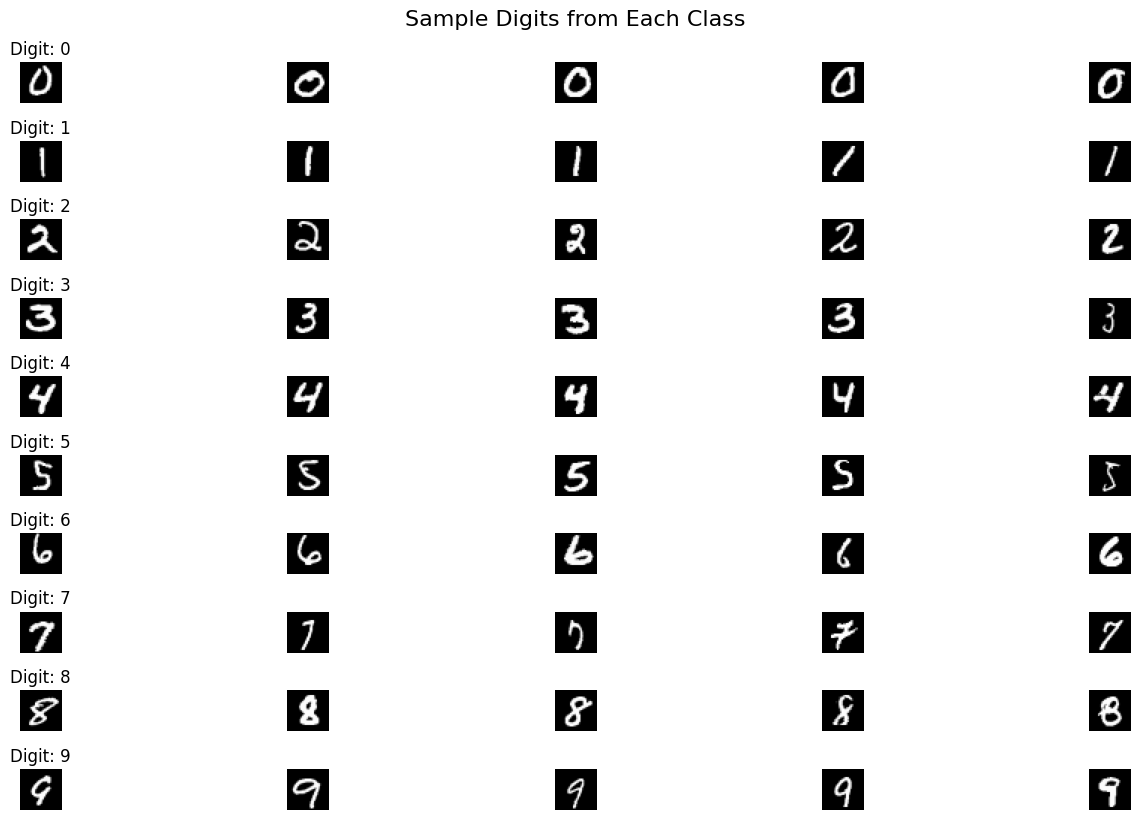

In [ ]:
# Displaying 5 random examples from each digit class (0-9)
plot_digit_samples(X_sampled, y_sampled)

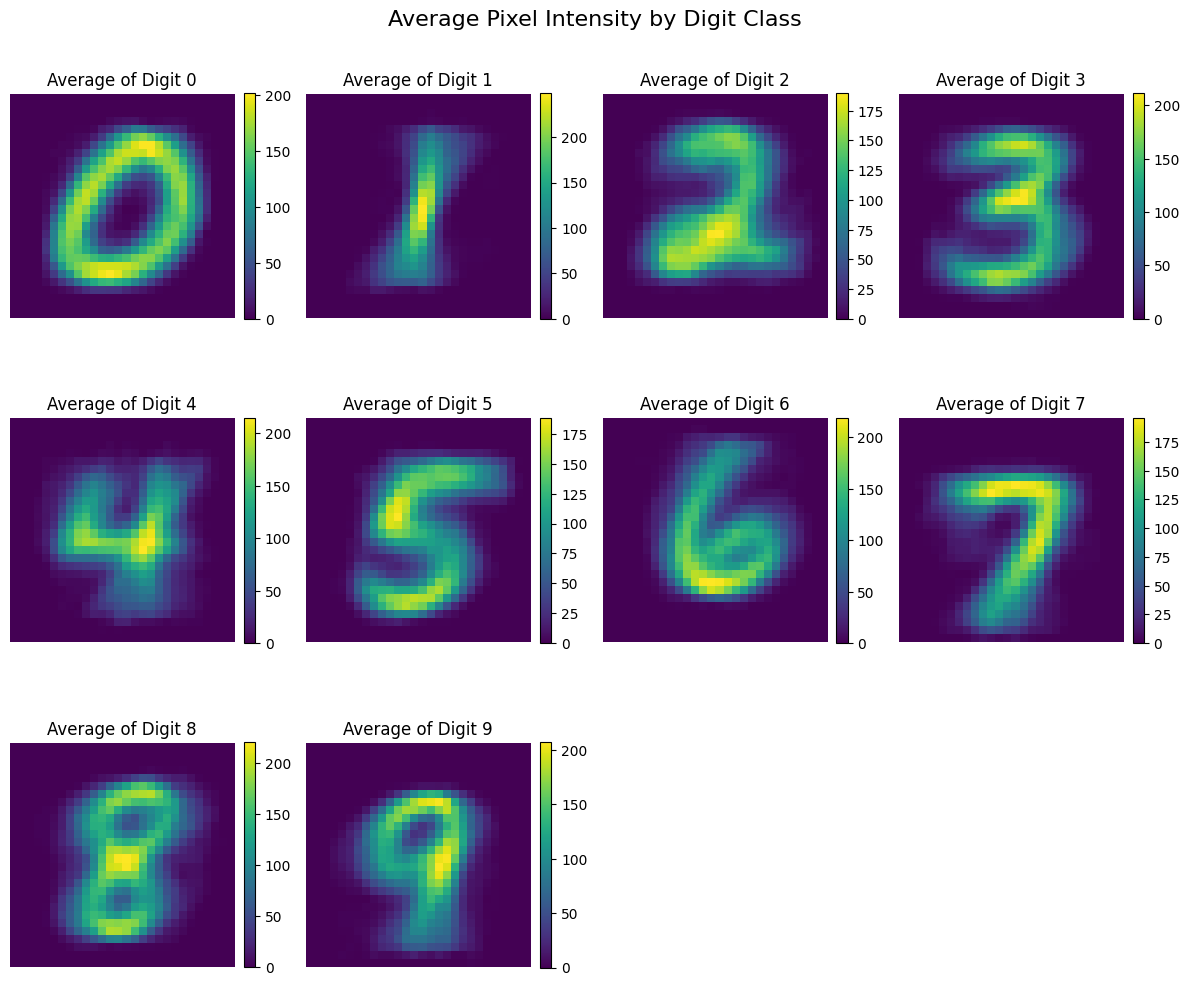

In [ ]:
# Computing and visualizing the average pattern for each digit
plot_pixel_intensities(X_sampled, y_sampled)

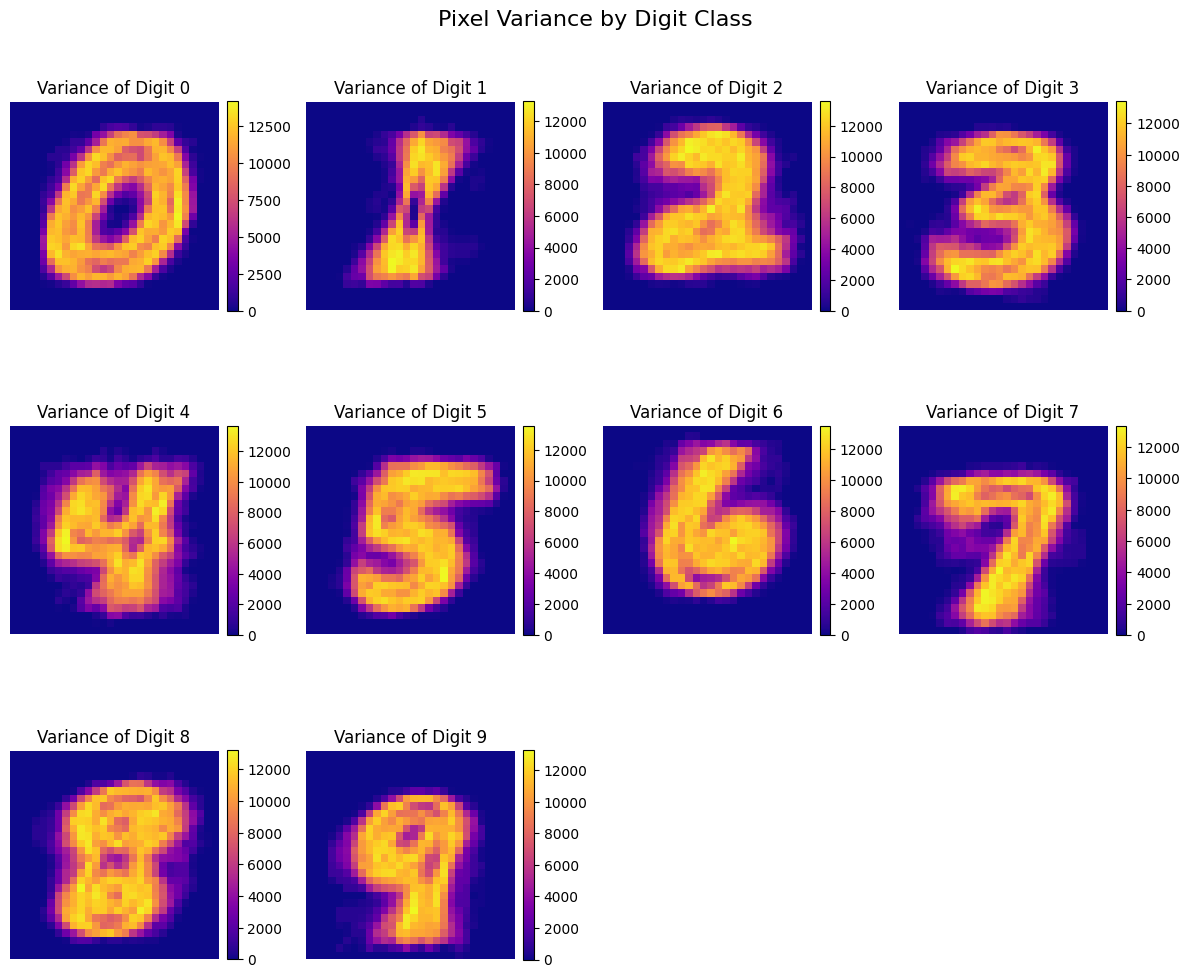

In [ ]:
# Showing which pixel positions vary most within each digit class
plot_pixel_variance(X_sampled, y_sampled)

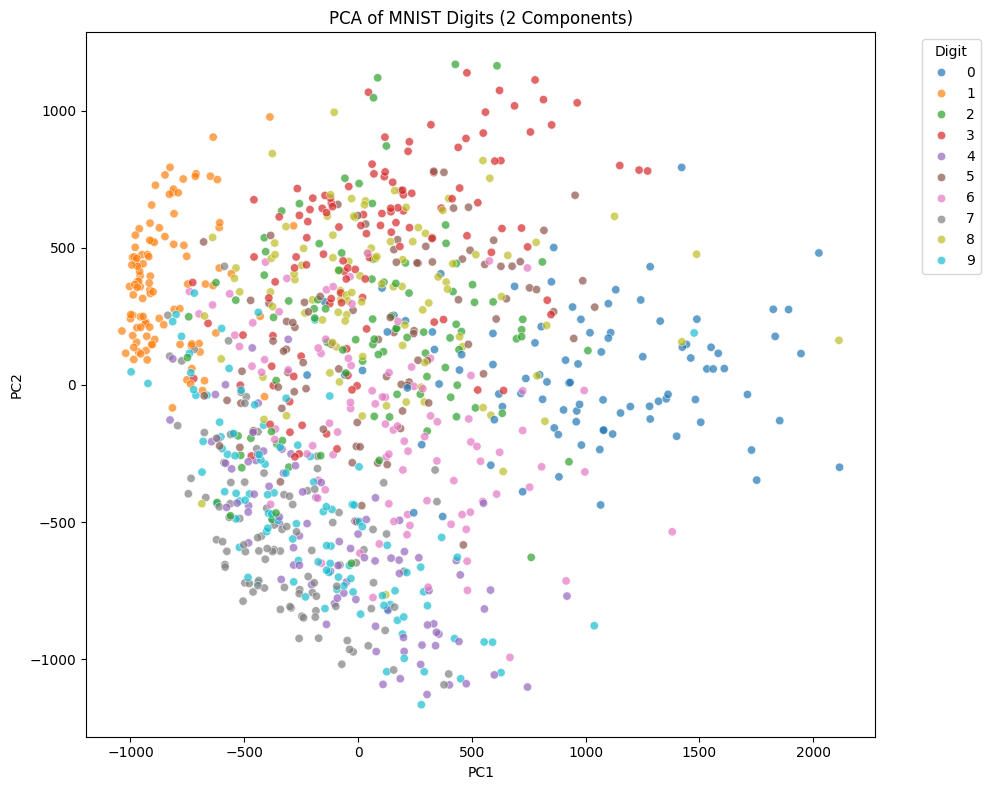

Variance explained by first two PCA components: 16.85%


In [ ]:
# Reducing the 784 dimensions to 2D to see class separability
visualize_with_pca(X_sampled.values, y_sampled)

## **Step 3: Formulating Assumptions from Visualization (5 Points)**

We can observe from the visualizations that certain pixels are more discriminative (e.g., center pixels have stronger signals for `8` but are absent in `1`). Some digits have significant overlap (e.g., `3` vs. `8`). Noise in background pixels may affect model robustness.

Each digit class has a distinct visual pattern as shown in the average intensity plots, while some digit classes (like 1 and 7) have less internal variation than others (like 8 and 3). The PCA visualization suggests that digits can be separated in lower-dimensional space. Some digits (0, 1, 7) appear more distinct, while others (5, 8, 3) may be more confusable. The high dimensionality (784 features) suggests SVM with non-linear kernels may perform well. K-NN should be effective given the cluster-like appearance in the PCA visualization.

### *Expected Performance Based on Observations*
Linear SVM is likely to struggle with similar-looking digits (`3` and `8`). It may work well for linearly separable digits (e.g., `1` vs. `8`).

RBF SVM should perform better due to non-linear decision boundaries. It could be more effective in handling digit curvature variations.

K-NN should work well but might be slow due to high-dimensional space. It can struggle when similar digits are close in pixel space.




## **Step 4: Model Training and Performance Evaluation (5 Points)**

### **Models Trained** :

- SVM (Linear)
- SVM (RBF)
- K-NN (k=3)

### **Performance Metrics Evaluated**
- Accuracy
- Precision
- Recall
- F1-Score


In [ ]:
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score, classification_report, confusion_matrix
import time

# Define a function to evaluate models
def evaluate_model(model, X_train, X_test, y_train, y_test, model_name):
    """Train and evaluate a model, returning performance metrics"""
    start_time = time.time()

    # Train the model
    model.fit(X_train, y_train)

    # Make predictions
    y_pred = model.predict(X_test)

    # Calculate metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')

    # Print results
    print(f"\n{model_name} Results:")
    print(f"Training time: {time.time() - start_time:.2f} seconds")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1-score: {f1:.4f}")

    # K-fold cross-validation
    cv_scores = cross_val_score(model, X_train, y_train, cv=n_folds, scoring='accuracy')
    print(f"Cross-validation accuracy: {cv_scores.mean():.4f} ± {cv_scores.std():.4f}")

    # Confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(10, 8))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=range(10), yticklabels=range(10))
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.title(f'Confusion Matrix - {model_name}')
    plt.savefig(f'confusion_matrix_{model_name.replace(" ", "_").lower()}.png')
    plt.close()

    # Classification report
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred))

    return model, accuracy, precision, recall, f1


In [ ]:
# Model a) SVM with linear kernel
print("\nTraining SVM with linear kernel...")
svm_linear = SVC(kernel='linear', random_state=42)
svm_linear_model, svm_linear_acc, svm_linear_prec, svm_linear_recall, svm_linear_f1 = evaluate_model(
    svm_linear, X_train_scaled, X_test_scaled, y_train, y_test, "SVM (Linear Kernel)"
)

# Analyze support vectors for linear SVM
n_support_vectors = svm_linear.n_support_.sum()
support_vectors_per_class = svm_linear.n_support_
print(f"\nNumber of support vectors in linear SVM: {n_support_vectors}")
for i, n in enumerate(support_vectors_per_class):
    print(f"  Class {i}: {n} support vectors")


Training SVM with linear kernel...

SVM (Linear Kernel) Results:
Training time: 0.13 seconds
Accuracy: 0.8967
Precision: 0.8993
Recall: 0.8967
F1-score: 0.8958
Cross-validation accuracy: 0.8657 ± 0.0455

Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.97      0.93        29
           1       0.89      1.00      0.94        31
           2       0.86      0.83      0.84        29
           3       0.91      0.83      0.87        36
           4       0.89      0.92      0.91        26
           5       0.86      0.93      0.89        27
           6       0.90      0.93      0.92        29
           7       0.96      0.84      0.90        31
           8       0.96      0.80      0.87        30
           9       0.86      0.94      0.90        32

    accuracy                           0.90       300
   macro avg       0.90      0.90      0.90       300
weighted avg       0.90      0.90      0.90       300


Number of su

In [ ]:
# Model b) SVM with RBF kernel
print("\nTraining SVM with RBF kernel...")
svm_rbf = SVC(kernel='rbf', gamma='scale', random_state=42)
svm_rbf_model, svm_rbf_acc, svm_rbf_prec, svm_rbf_recall, svm_rbf_f1 = evaluate_model(
    svm_rbf, X_train_scaled, X_test_scaled, y_train, y_test, "SVM (RBF Kernel)"
)

# Analyze support vectors for RBF SVM
n_support_vectors_rbf = svm_rbf.n_support_.sum()
support_vectors_per_class_rbf = svm_rbf.n_support_
print(f"\nNumber of support vectors in RBF SVM: {n_support_vectors_rbf}")
for i, n in enumerate(support_vectors_per_class_rbf):
    print(f"  Class {i}: {n} support vectors")


Training SVM with RBF kernel...

SVM (RBF Kernel) Results:
Training time: 0.31 seconds
Accuracy: 0.8567
Precision: 0.8727
Recall: 0.8567
F1-score: 0.8602
Cross-validation accuracy: 0.8400 ± 0.0498

Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.86      0.89        29
           1       0.94      0.94      0.94        31
           2       0.57      0.83      0.68        29
           3       0.94      0.83      0.88        36
           4       0.92      0.88      0.90        26
           5       0.92      0.89      0.91        27
           6       0.84      0.90      0.87        29
           7       0.81      0.68      0.74        31
           8       1.00      0.83      0.91        30
           9       0.86      0.94      0.90        32

    accuracy                           0.86       300
   macro avg       0.87      0.86      0.86       300
weighted avg       0.87      0.86      0.86       300


Number of support 

In [ ]:
# Model c) K-NN
print("\nTraining K-NN model...")
knn = KNeighborsClassifier(n_neighbors=5)
knn_model, knn_acc, knn_prec, knn_recall, knn_f1 = evaluate_model(
    knn, X_train_scaled, X_test_scaled, y_train, y_test, "K-NN (k=5)"
)

# Visualize misclassified examples
def visualize_misclassifications(model, X_test, y_test, model_name, n_samples=5):
    """Visualize examples that the model misclassified"""
    y_pred = model.predict(X_test)
    misclassified_indices = np.where(y_pred != y_test)[0]

    if len(misclassified_indices) > 0:
        n_samples = min(n_samples, len(misclassified_indices))
        selected_indices = np.random.choice(misclassified_indices, n_samples, replace=False)

        plt.figure(figsize=(15, 3))
        for i, idx in enumerate(selected_indices):
            plt.subplot(1, n_samples, i + 1)
            plt.imshow(X_test[idx].reshape(28, 28), cmap='gray')
            plt.title(f'True: {y_test.iloc[idx]}, Pred: {y_pred[idx]}')
            plt.axis('off')

        plt.suptitle(f'Misclassified Examples - {model_name}', fontsize=16)
        plt.tight_layout()
        plt.show()
    else:
        print(f"No misclassifications found for {model_name}!")



Training K-NN model...

K-NN (k=5) Results:
Training time: 0.05 seconds
Accuracy: 0.8200
Precision: 0.8394
Recall: 0.8200
F1-score: 0.8190
Cross-validation accuracy: 0.7929 ± 0.0452

Classification Report:
              precision    recall  f1-score   support

           0       0.85      1.00      0.92        29
           1       0.67      1.00      0.81        31
           2       0.95      0.62      0.75        29
           3       0.81      0.83      0.82        36
           4       0.90      0.73      0.81        26
           5       0.88      0.81      0.85        27
           6       0.86      0.86      0.86        29
           7       0.85      0.74      0.79        31
           8       0.96      0.73      0.83        30
           9       0.69      0.84      0.76        32

    accuracy                           0.82       300
   macro avg       0.84      0.82      0.82       300
weighted avg       0.84      0.82      0.82       300



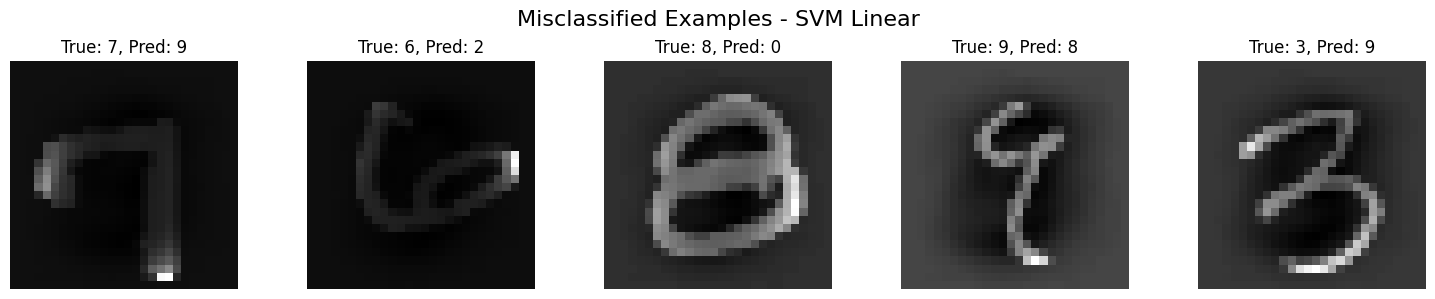

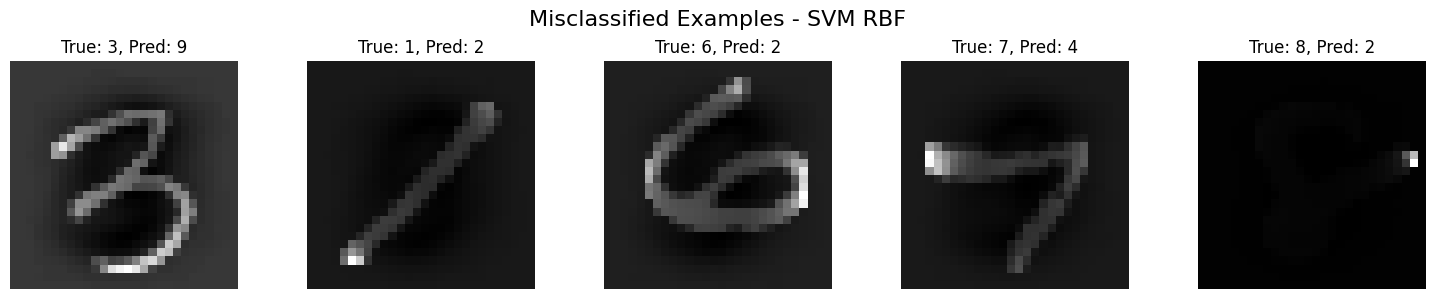

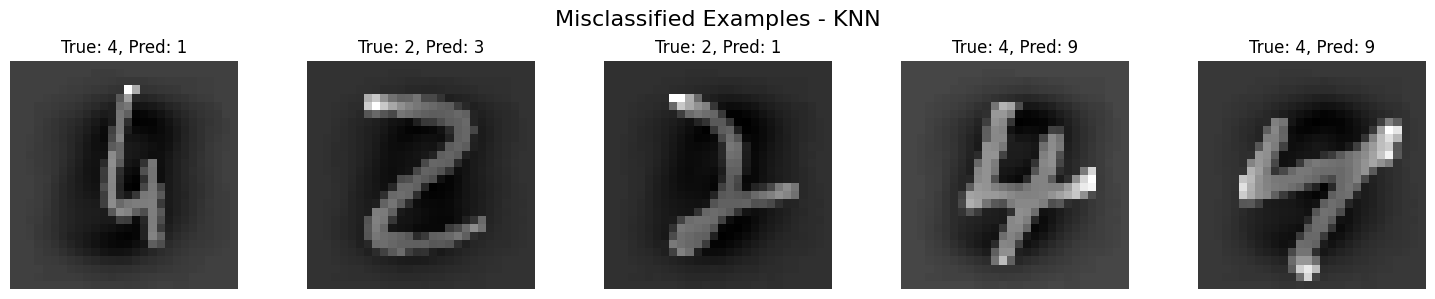

In [ ]:
# Visualize misclassified examples for each model
visualize_misclassifications(svm_linear, X_test_scaled, y_test, "SVM Linear")

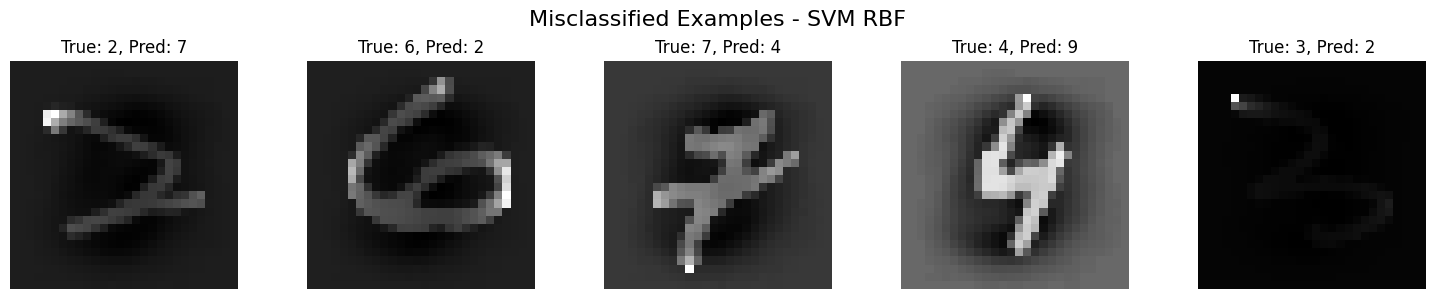

In [ ]:
visualize_misclassifications(svm_rbf, X_test_scaled, y_test, "SVM RBF")

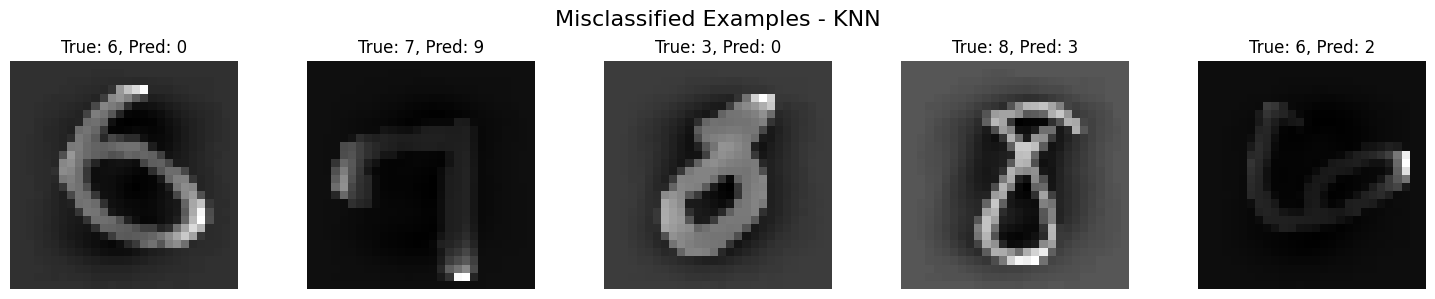

In [ ]:
visualize_misclassifications(knn, X_test_scaled, y_test, "KNN")

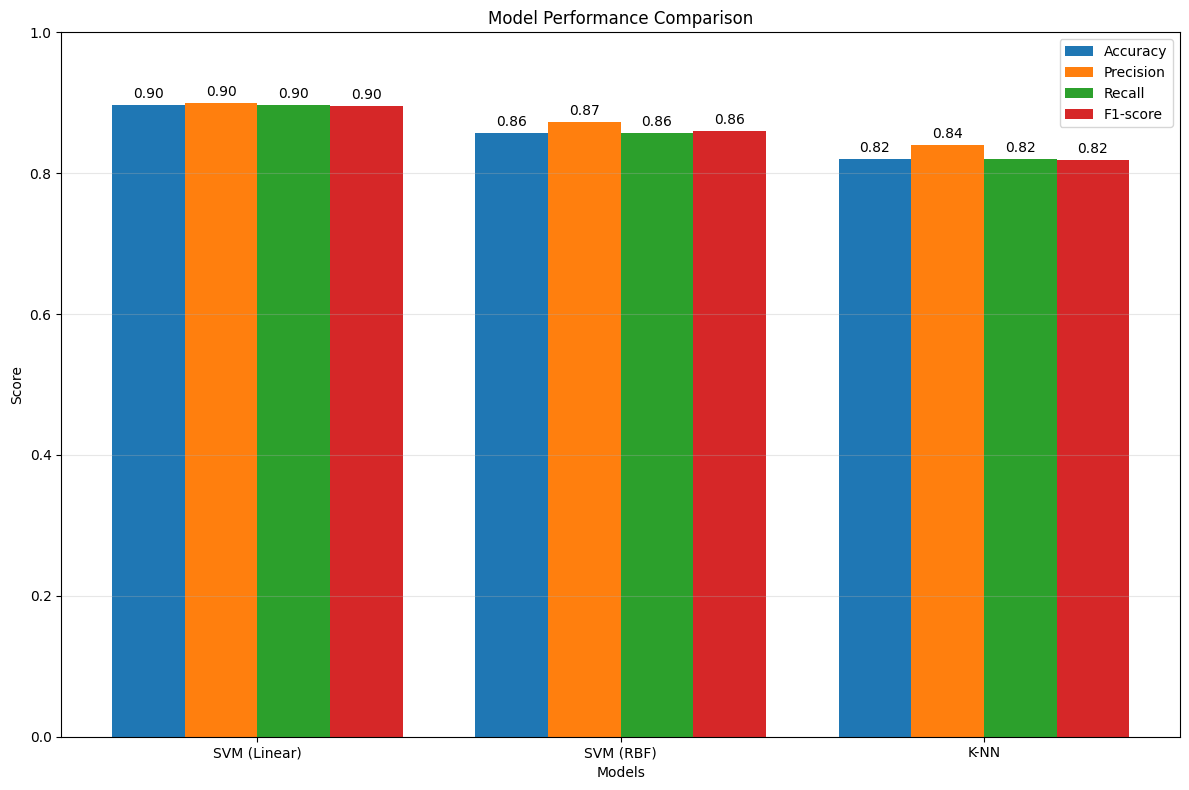

In [ ]:
# Compare model performance
models = ['SVM (Linear)', 'SVM (RBF)', 'K-NN']
accuracies = [svm_linear_acc, svm_rbf_acc, knn_acc]
precisions = [svm_linear_prec, svm_rbf_prec, knn_prec]
recalls = [svm_linear_recall, svm_rbf_recall, knn_recall]
f1_scores = [svm_linear_f1, svm_rbf_f1, knn_f1]

plt.figure(figsize=(12, 8))
x = np.arange(len(models))
width = 0.2

plt.bar(x - width*1.5, accuracies, width, label='Accuracy')
plt.bar(x - width/2, precisions, width, label='Precision')
plt.bar(x + width/2, recalls, width, label='Recall')
plt.bar(x + width*1.5, f1_scores, width, label='F1-score')

plt.xlabel('Models')
plt.ylabel('Score')
plt.title('Model Performance Comparison')
plt.xticks(x, models)
plt.legend()
plt.ylim(0, 1)
plt.grid(axis='y', alpha=0.3)

for i, v in enumerate(accuracies):
    plt.text(i - width*1.5, v + 0.01, f'{v:.2f}', ha='center')
for i, v in enumerate(precisions):
    plt.text(i - width/2, v + 0.01, f'{v:.2f}', ha='center')
for i, v in enumerate(recalls):
    plt.text(i + width/2, v + 0.01, f'{v:.2f}', ha='center')
for i, v in enumerate(f1_scores):
    plt.text(i + width*1.5, v + 0.01, f'{v:.2f}', ha='center')

plt.tight_layout()
plt.show()

## **Step 5: Analyzing Results Against Assumptions (5 Points)**

**Our initial assumptions from Step 3 included:**

MNIST digits would show complex, non-linear decision boundaries; RBF kernel would outperform linear kernel due to these non-linear relationships; Visually similar digits would cause classification challenges; The high dimensionality would favor more complex models.

However, our model evaluation results show a different pattern:

Linear SVM (90%) > RBF SVM (86%) > K-NN (82%).

This suggests that the digit classes in our sample are more linearly separable than expected and that the simpler models are more effective for this particular data sample. Furthermore, the "curse of dimensionality" may be affecting complex models more negatively.

**Analysis of Each Model's Performance:**

1) SVM with Linear Kernel (90%)

SVM creates a linear hyperplane in the 784-dimensional space to separate each digit class and uses a one-vs-rest approach for multi-class classification. It
maximizes the margin between classes while minimizing classification errors.

*Strengths:*

1) Simplicity and computational efficiency 2) Less prone to overfitting on this dataset 3) Performs well when dimensionality is high relative to sample size 4) Easier to interpret than non-linear models 5) Faster training and prediction times

*Limitations:*

1) Generally unable to capture non-linear relationships 2) May struggle with more complex handwritten styles not represented in this sample 3) Less flexible than kernel-based methods when data becomes more complex

2) SVM with RBF Kernel (86%)

It implicitly maps input features to a higher-dimensional space using the Gaussian kernel and creates non-linear decision boundaries to separate digit classes. It uses a similar one-vs-rest approach but with curved boundaries.

*Strengths:*

1) Ability to model non-linear relationships 2) Can capture more complex patterns in data 3) Typically works well for image classification tasks

*Limitations:*

1) More prone to overfitting, especially with limited data 2) Sensitive to hyperparameter selection (C and gamma) 3) Computationally more expensive than linear SVM 4) With 784 dimensions, may be creating unnecessarily complex boundaries
Requires more support vectors, increasing model size and prediction time

3) K-NN Model (82%)

K-NN classifies new digits based on the majority class among k nearest neighbors. It uses Euclidean distance in the high-dimensional space to determine similarity and makes no assumptions about the underlying distribution of the data.

*Strengths:*

1) No training phase required 2) Naturally handles multi-class problems 3) Works well when decision boundaries are irregular 4) Simple to understand and implement

*Limitations:*

1) Most affected by the curse of dimensionality among the three models 2) Distance metrics become less meaningful in very high dimensions 3) Prediction time increases with dataset size 4) Less effective when different features have different importance 5) Sensitive to the choice of k and distance metric.

The superior performance of the linear SVM challenges our initial assumptions about non-linear separability. This suggests that in the 784-dimensional space, digits may be more linearly separable than we initially thought or
our random sample of 1,000 instances may have resulted in a dataset with clearer linear boundaries. With high dimensionality (784 features) and relatively few samples (1,000), simpler models may generalize better by avoiding overfitting.

While our initial assumptions favored more complex models, the results demonstrate that simpler models can sometimes outperform complex ones, especially in high-dimensional spaces with limited samples. This highlights the importance of empirical testing and avoiding assumptions about model performance without evidence.


## **Step 6: Discussion on Evaluation Metrics (5 Points)**

Accuracy measures overall correctness but does not handle class imbalance well.
Precision is important when false positives are costly. Recall is important when missing a digit is costly, and F1-Score balances precision & recall.

Accuracy works well since MNIST is balanced. Precision matters for reducing misclassifications of similar digits. Recall is useful in ensuring all digits are recognized. F1-score is best for overall evaluation.

However, in this context, some of the limitations can pose challenge. High dimensionality of the data makes interpretation difficult and models don't capture structural relationships between adjacent pixels. A sample size of 1,000 might not fully represent handwritten digit variability. Hence, more advanced approaches like CNNs would likely outperform these models.